In [1]:
vis_size = (256,256)
device = 'cuda:0'
cache_dir = None

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
from PIL import Image
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusion3Pipeline
from method.ADG_SD3 import ADG_SD3,ADG_SD3_w_norm,ADG_SD3_wo_clip
from method.CFGplus import CFG_plus_SD3


In [3]:
pipeline = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-large", torch_dtype=torch.float16,cache_dir=cache_dir)
setattr(pipeline, 'ADG_SD3', ADG_SD3.__get__(pipeline))
setattr(pipeline, 'CFG_plus', CFG_plus_SD3.__get__(pipeline))
pipeline.to(device)
prompt = 'a bathroom with a toilet and a bath tub'

Couldn't connect to the Hub: (MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /api/models/stabilityai/stable-diffusion-3.5-large (Caused by ProxyError('Unable to connect to proxy', NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe22df7c520>: Failed to establish a new connection: [Errno 111] Connection refused')))"), '(Request ID: 4b9199d2-d723-4d09-92c0-2a80d8ca1e31)').
Will try to load from local cache.
Loading pipeline components...: 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]


# Fig: ADG vs. CFG

In [4]:
generator = torch.manual_seed(1)
image1 = pipeline.ADG_SD3(prompt=prompt,num_inference_steps=10, guidance_scale=4, num_images_per_prompt=1, generator=generator).images[0]
generator = torch.manual_seed(1)
image2 = pipeline.ADG_SD3(prompt=prompt,num_inference_steps=10, guidance_scale=9, num_images_per_prompt=1, generator=generator).images[0]
generator = torch.manual_seed(1)
image3 = pipeline(prompt=prompt,num_inference_steps=10, guidance_scale=4, num_images_per_prompt=1, generator=generator).images[0]
generator = torch.manual_seed(1)
image4 = pipeline(prompt=prompt,num_inference_steps=10, guidance_scale=9, num_images_per_prompt=1, generator=generator).images[0]

100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


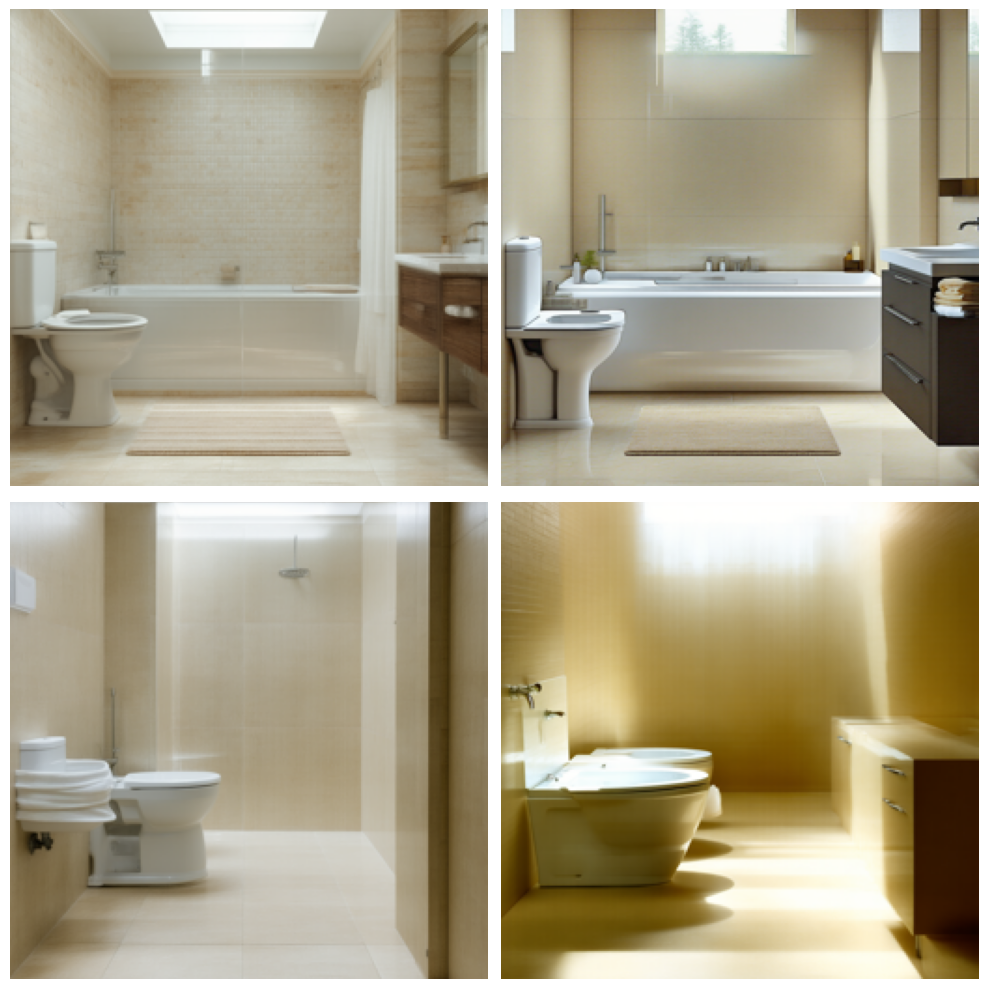

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel() 
axes[0].imshow(image1.resize(vis_size))
axes[0].axis('off')
axes[1].imshow(image2.resize(vis_size))
axes[1].axis('off')
axes[2].imshow(image3.resize(vis_size))
axes[2].axis('off')
axes[3].imshow(image4.resize(vis_size))
axes[3].axis('off')
plt.tight_layout()
plt.show()

# Fig: ablation

In [6]:
prompt = 'The golden beach is covered with fine, light-colored sand. On the surface, there is a sandcastle, built with clear details, including towers and walls. The structure stands amidst the surrounding beach, blending naturally with the sandy environment.'
num_inference_steps = 28
guidance_scale = 8
setattr(pipeline, 'ADG_norm', ADG_SD3_w_norm.__get__(pipeline))
setattr(pipeline, 'ADG_clip', ADG_SD3_wo_clip.__get__(pipeline))

In [7]:
generator = torch.manual_seed(1)
image1 = pipeline.ADG_SD3(prompt=prompt,num_inference_steps=num_inference_steps, guidance_scale=guidance_scale, num_images_per_prompt=1, generator=generator).images[0]
generator = torch.manual_seed(1)
image2 = pipeline.ADG_clip(prompt=prompt,num_inference_steps=num_inference_steps, guidance_scale=guidance_scale, num_images_per_prompt=1, generator=generator).images[0]
generator = torch.manual_seed(1)
image3 = pipeline.ADG_norm(prompt=prompt,num_inference_steps=num_inference_steps, guidance_scale=guidance_scale, num_images_per_prompt=1, generator=generator).images[0]

 14%|█▍        | 4/28 [00:01<00:11,  2.12it/s]

100%|██████████| 28/28 [00:13<00:00,  2.00it/s]


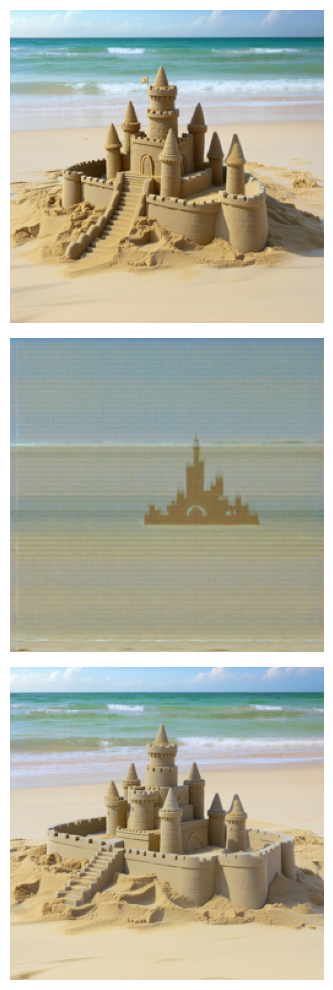

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
axes = axes.ravel() 
axes[0].imshow(image1.resize(vis_size))
axes[0].axis('off')
axes[1].imshow(image2.resize(vis_size))
axes[1].axis('off')
axes[2].imshow(image3.resize(vis_size))
axes[2].axis('off')
plt.tight_layout()
plt.show()

# Fig: main

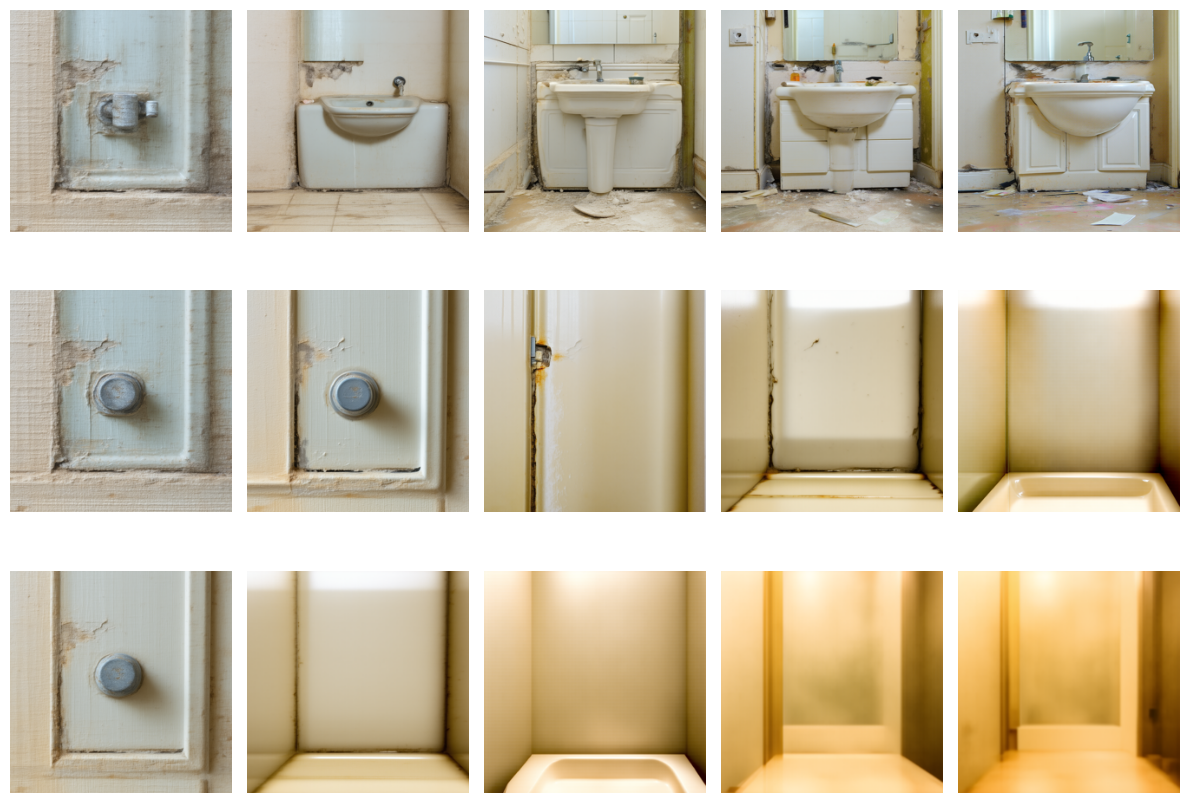

In [9]:
prompt = 'Part of a small bathroom in need of repair'
fig, axes = plt.subplots(3, 5, figsize=(12, 9))
pipeline.set_progress_bar_config(disable=True)
for idx1 in range(3):
    for idx2 in range(5):
        guidance_scale = idx2*2+2
        generator = torch.manual_seed(1)
        if idx1 == 0:
            img = pipeline.ADG_SD3(prompt=prompt,num_inference_steps=10, guidance_scale=guidance_scale, num_images_per_prompt=1, generator=generator).images[0]
        elif idx1 == 1:
            img = pipeline(prompt=prompt,num_inference_steps=10, guidance_scale=guidance_scale, num_images_per_prompt=1, generator=generator).images[0]
        else:
            img = pipeline.CFG_plus(prompt=prompt,num_inference_steps=10, guidance_scale=guidance_scale, num_images_per_prompt=1, generator=generator).images[0]
        img = img.resize(vis_size)
        axes[idx1, idx2].imshow(img)
        axes[idx1, idx2].axis('off')
plt.tight_layout()
plt.show()